Vanguard A/B Test — Hypothesis Testing & Performance Metrics


In [1]:
import pandas as pd

df_completion = pd.read_csv("../data/df_completion_ready.csv")
df_completion.head()


,client_id,completed,Variation,cost_per_client
0,169,1,NaN,5
1,336,0,NaN,5
2,546,1,NaN,5
3,555,1,Test,5
4,647,1,Test,5


In [2]:
completion_summary = df_completion.groupby('Variation')['completed'].agg(['count','sum'])
completion_summary['completion_rate'] = (completion_summary['sum'] / completion_summary['count']) * 100
print(completion_summary)


           count    sum  completion_rate
Variation                               
Control    23532  17422        74.035356
Test       26968  20881        77.428805


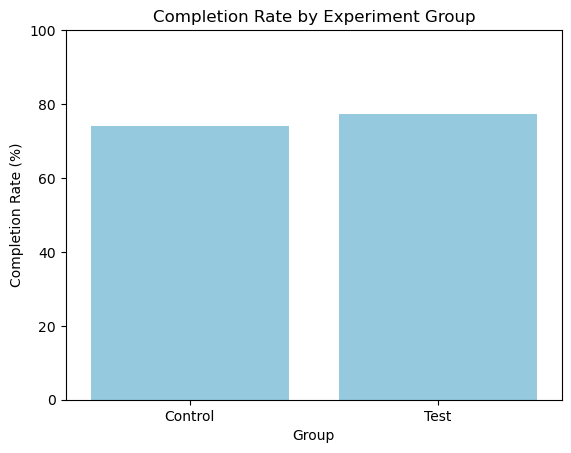

In [4]:
sns.barplot(x=completion_summary.index, y=completion_summary['completion_rate'], color='skyblue')
plt.title("Completion Rate by Experiment Group")
plt.ylabel("Completion Rate (%)")
plt.xlabel("Group")
plt.ylim(0, 100)
plt.show()



In [11]:
import pandas as pd

dtype_dict = {
    'client_id': str,
    'Variation': str,
    'clnt_tenure_yr': float,
    'clnt_tenure_mnth': float,
    'clnt_age': float,
    'gendr': str,
    'num_accts': float,
    'bal': float,
    'calls_6_mnth': float,
    'logons_6_mnth': float
}

df_clients = pd.read_csv("../data/df_clients_ready.csv", dtype=dtype_dict)



In [13]:
# Convert client_id to string in both dataframes
df_completion['client_id'] = df_completion['client_id'].astype(str)
df_clients['client_id'] = df_clients['client_id'].astype(str)

# Merge for engagement metrics
engagement_summary = df_completion.merge(
    df_clients[['client_id','logons_6_mnth','calls_6_mnth']],
    on='client_id',
    how='left'
).groupby('Variation')[['logons_6_mnth','calls_6_mnth']].mean()

print(engagement_summary)


           logons_6_mnth  calls_6_mnth
Variation                             
Control         6.166277      3.129213
Test            6.101851      3.061941


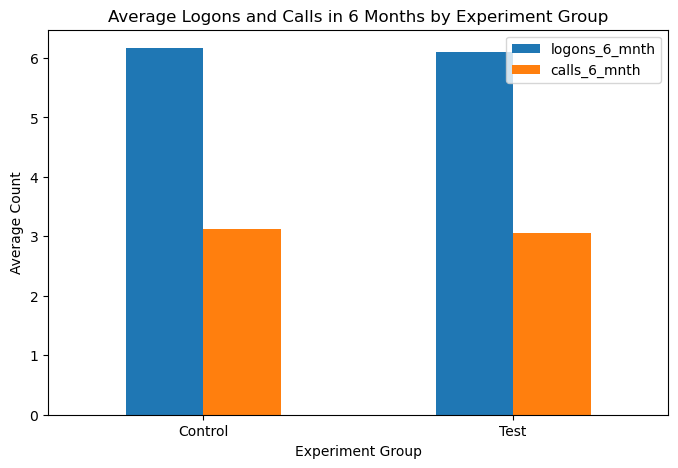

In [14]:
engagement_summary.plot(kind='bar', figsize=(8,5))
plt.title("Average Logons and Calls in 6 Months by Experiment Group")
plt.ylabel("Average Count")
plt.xlabel("Experiment Group")
plt.xticks(rotation=0)
plt.show()



In [15]:
cost_summary = df_completion.groupby('Variation').agg(
    total_completed=('completed','sum'),
    total_cost=('cost_per_client','sum')
)

print(cost_summary)


           total_completed  total_cost
Variation                             
Control              17422      117660
Test                 20881      134840


In [16]:
cost_summary['cost_per_completion'] = cost_summary['total_cost'] / cost_summary['total_completed']
print(cost_summary)


           total_completed  total_cost  cost_per_completion
Variation                                                  
Control              17422      117660             6.753530
Test                 20881      134840             6.457545


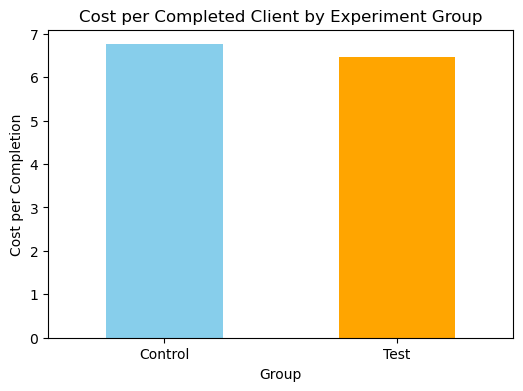

In [17]:
cost_summary['cost_per_completion'].plot(kind='bar', color=['skyblue','orange'], figsize=(6,4))
plt.title("Cost per Completed Client by Experiment Group")
plt.ylabel("Cost per Completion")
plt.xlabel("Group")
plt.xticks(rotation=0)
plt.show()


In [18]:
df_completion.to_csv("../tableau/df_completion_for_tableau.csv", index=False)
cost_summary.reset_index().to_csv("../tableau/cost_summary_for_tableau.csv", index=False)
engagement_summary.reset_index().to_csv("../tableau/engagement_summary_for_tableau.csv", index=False)
